In [1]:
pwd

'C:\\Users\\woute\\Documents\\Reproduction_project\\HEAT_Reproduction'

In [2]:
import pickle
from plot import plot_graph_rplan, plot_polygons_rplan
import matplotlib.pyplot as plt
from utils_rplan import ROOM_ARRAY_Z
import numpy as np
from PIL import Image
import os

In [5]:
COLORS = [np.array(ROOM_ARRAY_Z[n][1])/255 for n in range(18)]

polygon = pickle.load(open('../RPLAN/geometry/5.pickle', 'rb'))
image_test = Image.open(r'../heat/data/RPLAN_small/origional/5.png')

C:\Users\woute\AppData\Local\Temp\ipykernel_14752\31350530.py:3: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  polygon = pickle.load(open('../RPLAN/geometry/5.pickle', 'rb'))


<Figure size 640x480 with 0 Axes>

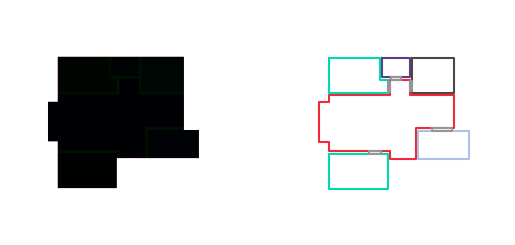

In [11]:
'''
This will print the plot 256px by 256px and save it to the file test.png.
TO DO:
1. The origional image is not square so we need to check wether the corners
   indicated in the geometry file are still in the correct location. 
   _>> the corners are not in the correct positons check with Krita.
2. It could be that the preprocessing step works better if the rooms are
   colored instead of white. If we want to use the preprosessing steps
'''
# Find the DPI of the screen
fig = plt.figure()
DPI = fig.dpi

# This create the figure.
# fig, axs = plt.subplots(figsize=(250/DPI, 250/DPI), dpi=DPI)
fig, axs = plt.subplots(1,2)
# This makes the image based on the polygon input
plot_polygons_rplan(polygon, axs[1], colors=COLORS)
axs[0].imshow(image_test)
axs[0].axis('off')

# Save the figure to a specified file name 
# this produces and figure of 640x480 which is to big
fig.savefig('../RPLAN/test.png') 

In [13]:
#Create max files from s3d dataset
folder_density_s3d = r"..\heat\data\s3d_floorplan\density"
folder_normals_s3d = r"..\heat\data\s3d_floorplan\normals"
folder_max_s3d = r"..\heat\data\s3d_floorplan\max"
image_nmr_s3d = "00018.png"


density_image_s3d = Image.open(os.path.join(folder_density_s3d,image_nmr_s3d))
normal_image_s3d = Image.open(os.path.join(folder_normals_s3d,image_nmr_s3d))
max_image_s3d = Image.open(os.path.join(folder_max_s3d,image_nmr_s3d))

density_array = np.asarray(density_image_s3d)
normal_array = np.asarray(normal_image_s3d)
density_array_3d = np.stack((density_array,density_array,density_array),axis=2)

max_rgb_s3d = np.maximum(density_array_3d,normal_array)
max_image_s3d = Image.fromarray(max_rgb_s3d)
max_image_s3d.save(os.path.join(folder_max_s3d,image_nmr_s3d))


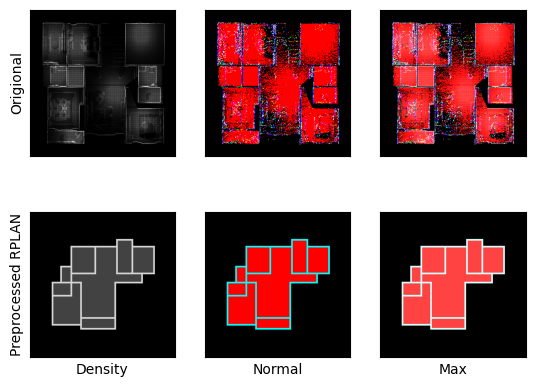

In [30]:
folder_density_s3d = r"..\heat\data\s3d_floorplan\density"
folder_normals_s3d = r"..\heat\data\s3d_floorplan\normals"
folder_max_s3d = r"..\heat\data\s3d_floorplan\max"
image_nmr_s3d = "00018.png"
folder_density = r"..\heat\data\RPLAN_small\density"
folder_normals = r"..\heat\data\RPLAN_small\normals"
folder_max = r"..\heat\data\RPLAN_small\max"
image_nmr = "7.png"


density_image_s3d = Image.open(os.path.join(folder_density_s3d,image_nmr_s3d))
normal_image_s3d = Image.open(os.path.join(folder_normals_s3d,image_nmr_s3d))
max_image_s3d = Image.open(os.path.join(folder_max_s3d,image_nmr_s3d))

density_image = Image.open(os.path.join(folder_density,image_nmr))
normal_image = Image.open(os.path.join(folder_normals,image_nmr))
max_image = Image.open(os.path.join(folder_max,image_nmr))

fig, axs = plt.subplots(2,3)
axs[0,0].imshow(density_image_s3d, cmap='gray')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
axs[0,0].set_ylabel('Origional')

axs[0,1].imshow(normal_image_s3d)
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])

axs[0,2].imshow(max_image_s3d)
axs[0,2].set_xticks([])
axs[0,2].set_yticks([])

axs[1,0].imshow(density_image)
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
axs[1,0].set_ylabel('Preprocessed RPLAN')
axs[1,0].set_xlabel('Density')

axs[1,1].imshow(normal_image)
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])
axs[1,1].set_xlabel('Normal')

axs[1,2].imshow(max_image)
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])
axs[1,2].set_xlabel('Max')

fig.savefig('density_normal_max.png')
